<a href="https://colab.research.google.com/github/nataliarufino/multilayers-perceptron/blob/main/Tarefa_1_2_Redes_Rasas_Perceptron_Multicamadas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Tarefa Prática 1.2: Perceptron Multicamadas  

### Modelo Perceptron:

* Ler o banco de dados Mammographic Mass Dataset

  • http://archive.ics.uci.edu/dataset/161/mammographic+mass

* Usar as características: age, shape, margin, density
* Fazer a classificação de severity, que pode ser benigno ou maligno
* Dividir o banco de dados em 80/20
* Implementar 3 arquiteturas diferentes
* Mostrar a acurácia no conjunto de validação de todas as 3 arquiteturas


# Importing Libraries

*   Numpy - read/data manipulation
*   Pandas - read/data manipulation
*   Sklearn - separate data, train the model
* Tensorflow - build model, train the model
* Matplotlib - show graphs

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import InputLayer, Dense
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix

# Preparing the data

1. Read the csv data
2. Show data




   Atributos:
   
   1. BI-RADS assessment: 1 to 5 (ordinal)  
   2. Age: patient's age in years (integer)
   3. Shape: mass shape: round=1 oval=2 lobular=3 irregular=4 (nominal)
   4. Margin: mass margin: circumscribed=1 microlobulated=2 obscured=3 ill-defined=4 spiculated=5 (nominal)
   5. Density: mass density high=1 iso=2 low=3 fat-containing=4 (ordinal)
   6. Severity: benign=0 or malignant=1 (binominal)

In [ ]:
data = pd.read_csv('/content/sample_data/mammographic_masses.csv')
data

,BI-RADS,Age,Shape,Margin,Density,Severity
0,5,67,3,5,3,1
1,5,58,4,5,3,1
2,4,28,1,1,3,0
3,5,57,1,5,3,1
4,5,76,1,4,3,1
...,...,...,...,...,...,...
825,4,47,2,1,3,0
826,4,56,4,5,3,1
827,4,64,4,5,3,0
828,5,66,4,5,3,1


3. Define the features (x):
* Age
* Shape
* Margin
* Density

In [ ]:
data.columns

Index(['BI-RADS', 'Age', 'Shape', 'Margin', 'Density', 'Severity'], dtype='object')

In [ ]:
features = ['Age', 'Shape', 'Margin', 'Density']
len(features)

4

4. Use *loc* to modify classes into integer values

Não será necessário pois neste caso todas as classes são do tipo int

In [ ]:
data.dtypes

BI-RADS     int64
Age         int64
Shape       int64
Margin      int64
Density     int64
Severity    int64
dtype: object

5. Define x as features and y as targets

Dividindo as características e os targets

In [ ]:
data_changed = data.drop('BI-RADS', axis = 1) #removendo a coluna

In [ ]:
x = data_changed[features].values
y = data_changed['Severity'].values

In [ ]:
x

array([[67,  3,  5,  3],
       [58,  4,  5,  3],
       [28,  1,  1,  3],
       ...,
       [64,  4,  5,  3],
       [66,  4,  5,  3],
       [62,  3,  3,  3]])

6. Normalizaing x values

In [ ]:
from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler()

x = min_max_scaler.fit_transform(x)

In [ ]:
x.shape

(830, 4)

In [ ]:
np.unique(y)

array([0, 1])

In [ ]:
y

array([1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,

A classe do vetor target é binária

Para a classe binária, vamos usar a função de perda **binary_crossentropy**

7. Split the data

80% para treinamento
20% para teste

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=0)

In [ ]:
x_train.shape

(664, 4)

In [ ]:
x_test.shape

(166, 4)

# Building the models

Usar a classe Sequential e definir as camadas de entrada (`InputLayer`) e densas (`Dense Layer`)

Como a classe é binária, temos para a camada de saída:
* neurônios = 1
* função de ativação: sigmoid
* função de perda: binary_crossentropy

## Arquitetura 1

In [ ]:
model_1 = Sequential([InputLayer(input_shape=(4,)), # é igual a quantidade de características
                    Dense(1024, activation='relu'),
                    Dense(512, activation='relu'),
                    Dense(64, activation='relu'),
                    Dense(16, activation='relu'),
                    Dense(1, activation='sigmoid')])

model_1.summary()

Model: "sequential_30"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_120 (Dense)           (None, 1024)              5120      
                                                                 
 dense_121 (Dense)           (None, 512)               524800    
                                                                 
 dense_122 (Dense)           (None, 64)                32832     
                                                                 
 dense_123 (Dense)           (None, 16)                1040      
                                                                 
 dense_124 (Dense)           (None, 1)                 17        
                                                                 
Total params: 563,809
Trainable params: 563,809
Non-trainable params: 0
_________________________________________________________________


Compile the model

* ` Optimizer = adam`

In [ ]:
model_1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

## Arquitetura 2

In [ ]:
model_2 = Sequential([InputLayer(input_shape=(4,)), # é igual a quantidade de características
                    Dense(10, activation='relu'),
                    Dense(5, activation='relu'),
                    Dense(4, activation='relu'),
                    Dense(1, activation='sigmoid')]) # última camada deve ser 1 por se tratar de classificação binária

model_2.summary()

Model: "sequential_31"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_125 (Dense)           (None, 10)                50        
                                                                 
 dense_126 (Dense)           (None, 5)                 55        
                                                                 
 dense_127 (Dense)           (None, 4)                 24        
                                                                 
 dense_128 (Dense)           (None, 1)                 5         
                                                                 
Total params: 134
Trainable params: 134
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

## Arquitetura 3

In [ ]:
model_3 = Sequential([InputLayer(input_shape=(4,)), # é igual a quantidade de características
                    Dense(60, activation='relu'),
                    Dense(30, activation='relu'),
                    Dense(1, activation='sigmoid')]) # um neurônio para cada coluna

model_3.summary()

Model: "sequential_32"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_129 (Dense)           (None, 60)                300       
                                                                 
 dense_130 (Dense)           (None, 30)                1830      
                                                                 
 dense_131 (Dense)           (None, 1)                 31        
                                                                 
Total params: 2,161
Trainable params: 2,161
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_3.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Training the models

1. Chamar a função `fit()` para treinar
2. Passar como parâmetros x_train, y_train, tamanho do batch e quantidade de épocas

## Para o modelo 1

```
batch_size = 32
epochs = 50

```



In [ ]:
history_1= model_1.fit(x_train, y_train, batch_size=32, epochs=200)

Epoch 1/200
21/21 [==============================] - 2s 16ms/step - loss: 0.6016 - accuracy: 0.7108
Epoch 2/200
21/21 [==============================] - 0s 15ms/step - loss: 0.5256 - accuracy: 0.7831
Epoch 3/200
21/21 [==============================] - 0s 15ms/step - loss: 0.4796 - accuracy: 0.7982
Epoch 4/200
21/21 [==============================] - 0s 16ms/step - loss: 0.4661 - accuracy: 0.8072
Epoch 5/200
21/21 [==============================] - 0s 14ms/step - loss: 0.4687 - accuracy: 0.7952
Epoch 6/200
21/21 [==============================] - 0s 14ms/step - loss: 0.4594 - accuracy: 0.7982
Epoch 7/200
21/21 [==============================] - 0s 15ms/step - loss: 0.4444 - accuracy: 0.8087
Epoch 8/200
21/21 [==============================] - 0s 15ms/step - loss: 0.4422 - accuracy: 0.8087
Epoch 9/200
21/21 [==============================] - 0s 15ms/step - loss: 0.4479 - accuracy: 0.7967
Epoch 10/200
21/21 [==============================] - 0s 15ms/step - loss: 0.4616 - accuracy: 0.7861

## Para o modelo 2

```
batch_size = 64
epochs = 100
```




In [ ]:
history_2 = model_2.fit(x_train, y_train, batch_size=64, epochs=400)

Epoch 1/400
11/11 [==============================] - 1s 5ms/step - loss: 0.6991 - accuracy: 0.4864
Epoch 2/400
11/11 [==============================] - 0s 5ms/step - loss: 0.6862 - accuracy: 0.4940
Epoch 3/400
11/11 [==============================] - 0s 4ms/step - loss: 0.6801 - accuracy: 0.5030
Epoch 4/400
11/11 [==============================] - 0s 4ms/step - loss: 0.6753 - accuracy: 0.5527
Epoch 5/400
11/11 [==============================] - 0s 5ms/step - loss: 0.6711 - accuracy: 0.6370
Epoch 6/400
11/11 [==============================] - 0s 5ms/step - loss: 0.6673 - accuracy: 0.6536
Epoch 7/400
11/11 [==============================] - 0s 4ms/step - loss: 0.6634 - accuracy: 0.6536
Epoch 8/400
11/11 [==============================] - 0s 5ms/step - loss: 0.6593 - accuracy: 0.6551
Epoch 9/400
11/11 [==============================] - 0s 5ms/step - loss: 0.6549 - accuracy: 0.6581
Epoch 10/400
11/11 [==============================] - 0s 4ms/step - loss: 0.6503 - accuracy: 0.6611
Epoch 11/

## Para o modelo 3

```
batch_size = 128
epochs = 200
```



In [ ]:
history_3 = model_3.fit(x_train, y_train, batch_size=128, epochs=800)

Epoch 1/800
6/6 [==============================] - 1s 4ms/step - loss: 0.7071 - accuracy: 0.4970
Epoch 2/800
6/6 [==============================] - 0s 4ms/step - loss: 0.6666 - accuracy: 0.7108
Epoch 3/800
6/6 [==============================] - 0s 4ms/step - loss: 0.6395 - accuracy: 0.7229
Epoch 4/800
6/6 [==============================] - 0s 3ms/step - loss: 0.6167 - accuracy: 0.7274
Epoch 5/800
6/6 [==============================] - 0s 4ms/step - loss: 0.5990 - accuracy: 0.7500
Epoch 6/800
6/6 [==============================] - 0s 4ms/step - loss: 0.5827 - accuracy: 0.7530
Epoch 7/800
6/6 [==============================] - 0s 4ms/step - loss: 0.5679 - accuracy: 0.7711
Epoch 8/800
6/6 [==============================] - 0s 4ms/step - loss: 0.5549 - accuracy: 0.7816
Epoch 9/800
6/6 [==============================] - 0s 4ms/step - loss: 0.5414 - accuracy: 0.7861
Epoch 10/800
6/6 [==============================] - 0s 3ms/step - loss: 0.5305 - accuracy: 0.7861
Epoch 11/800
6/6 [===========

# Evaluating the models

1. Usar `model.evaluate` para avaliar o x_test
2. Usar o `model.predicts` para gerar predições para o x_test

## Arquitetura 1

In [ ]:
evaluate = model_1.evaluate(x_test, y_test)

6/6 [==============================] - 0s 7ms/step - loss: 0.6351 - accuracy: 0.7952


3. Mostrar gráficos de acurácia e perda

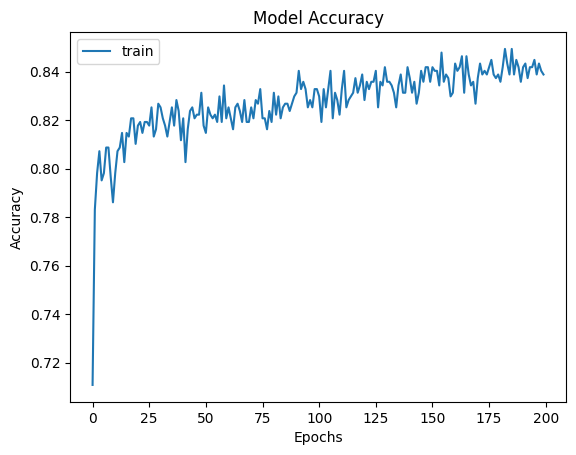

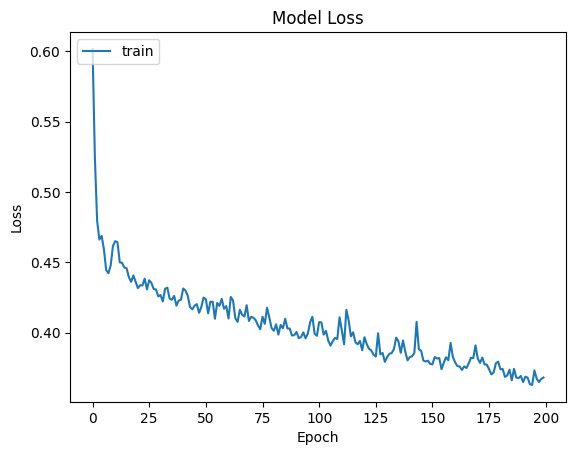

In [ ]:
# Gráfico de Acurácia:
plt.plot(history_1.history['accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train'], loc='upper left')
plt.show()

# Gráfico de Perda:
plt.plot(history_1.history['loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train'], loc='upper left')
plt.show()

Para ver como o modelo treinado está se comportando, farei previsões padrão ouro e verei o que o modelo retorna

In [ ]:
predictions_1 = model_1.predict(x_test)
predictions_1

6/6 [==============================] - 0s 6ms/step


array([[9.07311559e-01],
       [8.65069032e-03],
       [7.51962066e-01],
       [1.16014667e-01],
       [2.80774049e-02],
       [9.99372363e-01],
       [9.21656370e-01],
       [8.99524271e-01],
       [8.69907498e-01],
       [1.24279954e-01],
       [1.70055002e-01],
       [9.78493273e-01],
       [9.15688038e-01],
       [1.60845980e-01],
       [7.34440982e-01],
       [1.38094842e-01],
       [8.88922572e-01],
       [9.99777138e-01],
       [8.41009393e-02],
       [8.88922572e-01],
       [9.97353137e-01],
       [9.98450756e-01],
       [4.90669399e-01],
       [6.50131226e-01],
       [9.24232543e-01],
       [8.89316916e-01],
       [1.14167757e-01],
       [6.49238765e-01],
       [8.41886699e-01],
       [1.08046256e-01],
       [6.72049999e-01],
       [9.27064657e-01],
       [3.60044502e-02],
       [8.69907498e-01],
       [7.97865272e-01],
       [4.09598231e-01],
       [6.63365662e-01],
       [3.31895286e-03],
       [9.24364030e-02],
       [9.87002432e-01],


In [ ]:
print(predictions_1[25])
print(y_test[25])

[0.8893169]
1


In [ ]:
predictions_1.shape

(166, 1)

Já que se trata de uma classificação binária, podemos traçar um **limiar**. Definir um limiar é importante para transformar probabilidades contínuas em previsões discretas, tornando o modelo capaz de fazer escolhas e tomar decisões de classificação

In [ ]:
limiar = 0.5
y_pred_1 = np.where(predictions_1 > limiar, 1, 0)
y_pred_1

array([[1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
    

In [ ]:
y_test

array([0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0])

In [ ]:
y_test.shape

(166,)

In [ ]:
y_pred_1.shape

(166, 1)

Com as respostas preditas e as respostas padrão ouro, pode-se analisar a **matriz de confusão**

In [ ]:
cm_1 = confusion_matrix(y_test, y_pred_1)
cm_1

array([[69, 22],
       [12, 63]])

Novas previsões

In [ ]:
x_new = np.array([[74,4,5,3]]) # saída esperada é 1 (nº 120)
x_new.shape

(1, 4)

In [ ]:
y_new = model_1.predict(x_new)
y_new

limiar = 0.5
y_pred_new = np.where(y_new > limiar, 1, 0)
y_pred_new

1/1 [==============================] - 0s 140ms/step


array([[1]])

In [ ]:
x_new = np.array([[48,4,4,3]]) # a saída esperada é 0 (nº 137)
y_new = model_1.predict(x_new)
y_new

limiar = 0.7
y_pred_new = np.where(y_new > limiar, 1, 0)
y_pred_new

1/1 [==============================] - 0s 33ms/step


array([[1]])

O modelo está respondendo bem a verdadeiros positivos e verdadeiros negativos (TP e TN), mas ainda está apresentando um número consideravelmente alto de falsos negativos, sendo preciso aumentar o limiar para diminuir os erros FP

Entretanto, isso pode levar a um aumento nos falsos negativos, diminuindo a sensibilidade e potencialmente resultando em pacientes com malignidades não detectadas

## Arquitetura 2

In [ ]:
evaluate = model_2.evaluate(x_test, y_test)

6/6 [==============================] - 0s 3ms/step - loss: 0.4977 - accuracy: 0.7711


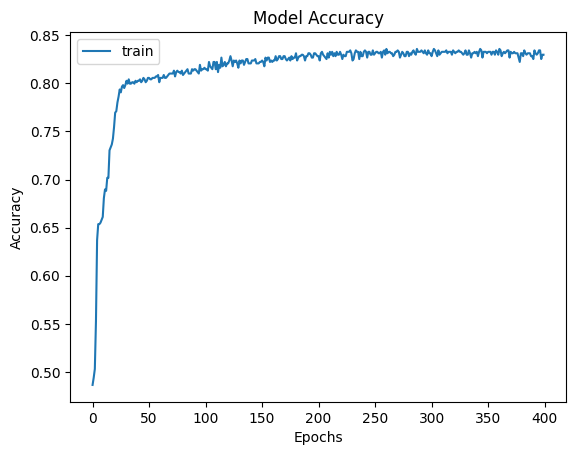

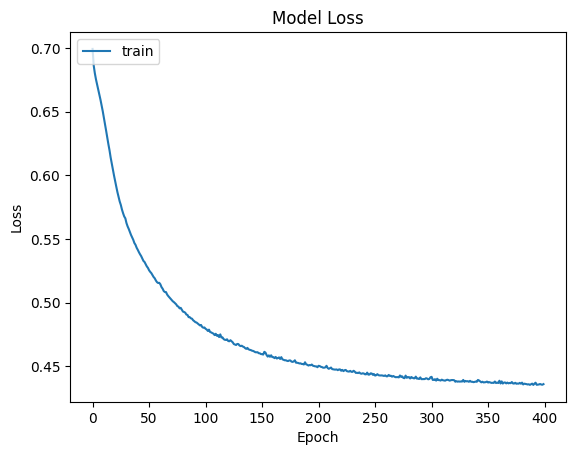

In [ ]:
# Gráfico de Acurácia:
plt.plot(history_2.history['accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train'], loc='upper left')
plt.show()

# Gráfico de Perda:
plt.plot(history_2.history['loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train'], loc='upper left')
plt.show()

In [ ]:
predictions_2 = model_2.predict(x_test)
predictions_2

6/6 [==============================] - 0s 3ms/step


array([[0.87652165],
       [0.23173739],
       [0.7965216 ],
       [0.12111867],
       [0.12111867],
       [0.9587154 ],
       [0.8921265 ],
       [0.8247518 ],
       [0.8614789 ],
       [0.12111867],
       [0.12111867],
       [0.75711656],
       [0.8093538 ],
       [0.13593604],
       [0.78559256],
       [0.12111867],
       [0.8691837 ],
       [0.9751573 ],
       [0.38338795],
       [0.8691837 ],
       [0.71942854],
       [0.95867765],
       [0.12111867],
       [0.7049068 ],
       [0.88350296],
       [0.8790753 ],
       [0.12111867],
       [0.717361  ],
       [0.84867847],
       [0.12111867],
       [0.63901526],
       [0.52488875],
       [0.18544886],
       [0.8614789 ],
       [0.8126485 ],
       [0.14243698],
       [0.44833577],
       [0.12111867],
       [0.12111867],
       [0.93689823],
       [0.13593604],
       [0.60566443],
       [0.91219735],
       [0.12111867],
       [0.37981325],
       [0.12111867],
       [0.12111867],
       [0.402

In [ ]:
predictions_2[25]
y_test[25]

1

In [ ]:
predictions_2.shape

(166, 1)

In [ ]:
limiar = 0.5
y_pred_2 = np.where(predictions_2 > limiar, 1, 0)
y_pred_2

array([[1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
    

In [ ]:
y_test.shape

(166,)

In [ ]:
y_pred_2.shape

(166, 1)

In [ ]:
cm_2 = confusion_matrix(y_test, y_pred_2)
cm_2

array([[69, 22],
       [16, 59]])

80 - TP (verdadeiros positivos)

11 - FN (falsos negativos)

23 - FP (falsos positivos)

52 - TN (verdadeiros negativos)

In [ ]:
x_new = np.array([[74,4,5,3]]) # resposta esperada é 1 (nº 120)
x_new.shape

(1, 4)

In [ ]:
y_new = model_2.predict(x_new)
limiar = 0.5
y_pred_new = np.where(y_new > limiar, 1, 0)
y_pred_new

1/1 [==============================] - 0s 156ms/step


array([[1]])

In [ ]:
x_new = np.array([[48,4,4,3]]) # a saída esperada é 0 (nº 137)
y_new = model_2.predict(x_new)
y_new

limiar = 0.7
y_pred_new = np.where(y_new > limiar, 1, 0)
y_pred_new

1/1 [==============================] - 0s 38ms/step


array([[1]])

## Arquitetura 3

In [ ]:
evaluate = model_3.evaluate(x_test, y_test)

6/6 [==============================] - 0s 4ms/step - loss: 0.5104 - accuracy: 0.7892


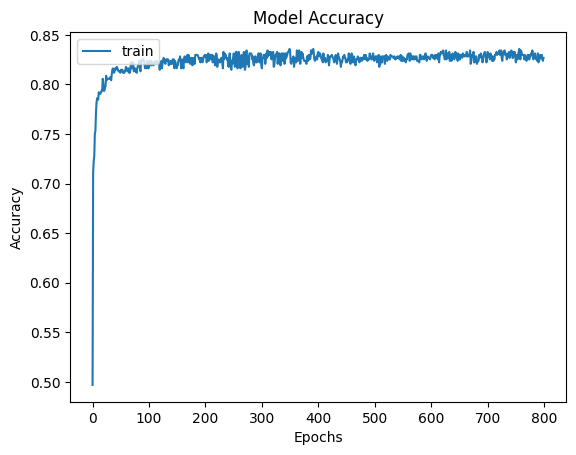

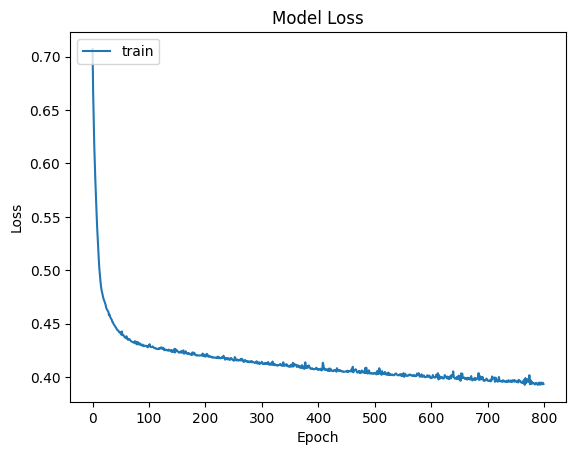

In [ ]:
# Gráfico de Acurácia:
plt.plot(history_3.history['accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train'], loc='upper left')
plt.show()

# Gráfico de Perda:
plt.plot(history_3.history['loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train'], loc='upper left')
plt.show()

In [ ]:
predictions_3 = model_3.predict(x_test)
predictions_3

6/6 [==============================] - 0s 3ms/step


array([[0.8650584 ],
       [0.06561226],
       [0.7381109 ],
       [0.09534696],
       [0.0438428 ],
       [0.9906332 ],
       [0.8818564 ],
       [0.8118711 ],
       [0.825176  ],
       [0.1340679 ],
       [0.20082621],
       [0.9276998 ],
       [0.9044709 ],
       [0.13550866],
       [0.72902167],
       [0.16392276],
       [0.84617174],
       [0.9940587 ],
       [0.23843172],
       [0.84617174],
       [0.9583837 ],
       [0.98386407],
       [0.3257575 ],
       [0.8313294 ],
       [0.8819496 ],
       [0.9002783 ],
       [0.08728714],
       [0.7245494 ],
       [0.7991842 ],
       [0.06651741],
       [0.62514997],
       [0.674781  ],
       [0.09087051],
       [0.825176  ],
       [0.7890182 ],
       [0.3118402 ],
       [0.3582237 ],
       [0.01885344],
       [0.03805093],
       [0.9662973 ],
       [0.13550866],
       [0.41481075],
       [0.9411479 ],
       [0.00362496],
       [0.69271904],
       [0.04592013],
       [0.05532317],
       [0.423

In [ ]:
print(predictions_3[25])
print(y_test[25])

[0.9002783]
1


In [ ]:
predictions_3.shape

(166, 1)

In [ ]:
limiar = 0.5
y_pred_3 = np.where(predictions_3 > limiar, 1, 0)
y_pred_3

array([[1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
    

In [ ]:
y_test

array([0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0])

In [ ]:
y_test.shape

(166,)

In [ ]:
y_pred_3.shape

(166, 1)

In [ ]:
cm_3 = confusion_matrix(y_test, y_pred_3)
cm_3

array([[70, 21],
       [14, 61]])

72 - TP

19 - FN

19 - FP

56 - TN

In [ ]:
x_new = np.array([[74,4,5,3]]) # resposta esperada é 1 (nº 120)
x_new.shape

(1, 4)

In [ ]:
y_new = model_3.predict(x_new)
limiar = 0.5
y_pred_new = np.where(y_new > limiar, 1, 0)
y_pred_new

1/1 [==============================] - 0s 73ms/step


array([[1]])

In [ ]:
x_new = np.array([[48,4,4,3]]) # a saída esperada é 0 (nº 137)
y_new = model_3.predict(x_new)
y_new

limiar = 0.7
y_pred_new = np.where(y_new > limiar, 1, 0)
y_pred_new

1/1 [==============================] - 0s 27ms/step


array([[1]])

# Salving the models

1. Usar o `model.save` para salvar o modelo

In [ ]:
model_1.save('model_32_200_mama.h5')
model_2.save('model_64_400_mama.h5')
model_3.save('model_128_800_mama.h5')

2. Usar o `tf.keras.models.load_model` para carregar o modelo

In [ ]:
model_1 = tf.keras.models.load_model('model_32_200_mama.h5')
model_2 = tf.keras.models.load_model('model_64_400_mama.h5')
model_3 = tf.keras.models.load_model('model_128_800_mama.h5')

3. Usar ```evaluate```para avaliar os modelos

In [ ]:
evaluation_results_1 = model_1.evaluate(x_test, y_test)
print(evaluation_results_1)

6/6 [==============================] - 0s 5ms/step - loss: 0.6351 - accuracy: 0.7952
[0.6351142525672913, 0.7951807379722595]


In [ ]:
y_new2 = model_1.predict(x_new)
y_new2

1/1 [==============================] - 0s 88ms/step


array([[1.]], dtype=float32)

In [ ]:
evaluation_results_2 = model_2.evaluate(x_test, y_test)
print(evaluation_results_2)

6/6 [==============================] - 0s 3ms/step - loss: 0.4977 - accuracy: 0.7711
[0.49769219756126404, 0.7710843086242676]


In [ ]:
y_new2 = model_2.predict(x_new)
y_new2

1/1 [==============================] - 0s 124ms/step


array([[1.]], dtype=float32)

In [ ]:
evaluation_results_3 = model_3.evaluate(x_test, y_test)
print(evaluation_results_3)

6/6 [==============================] - 0s 6ms/step - loss: 0.5104 - accuracy: 0.7892
[0.510356605052948, 0.7891566157341003]


In [ ]:
y_new2 = model_3.predict(x_new)
y_new2

1/1 [==============================] - 0s 125ms/step


array([[1.]], dtype=float32)